In [2]:
import numpy as np, uproot as ur, awkward as ak, pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle
import os
from scipy.optimize import curve_fit

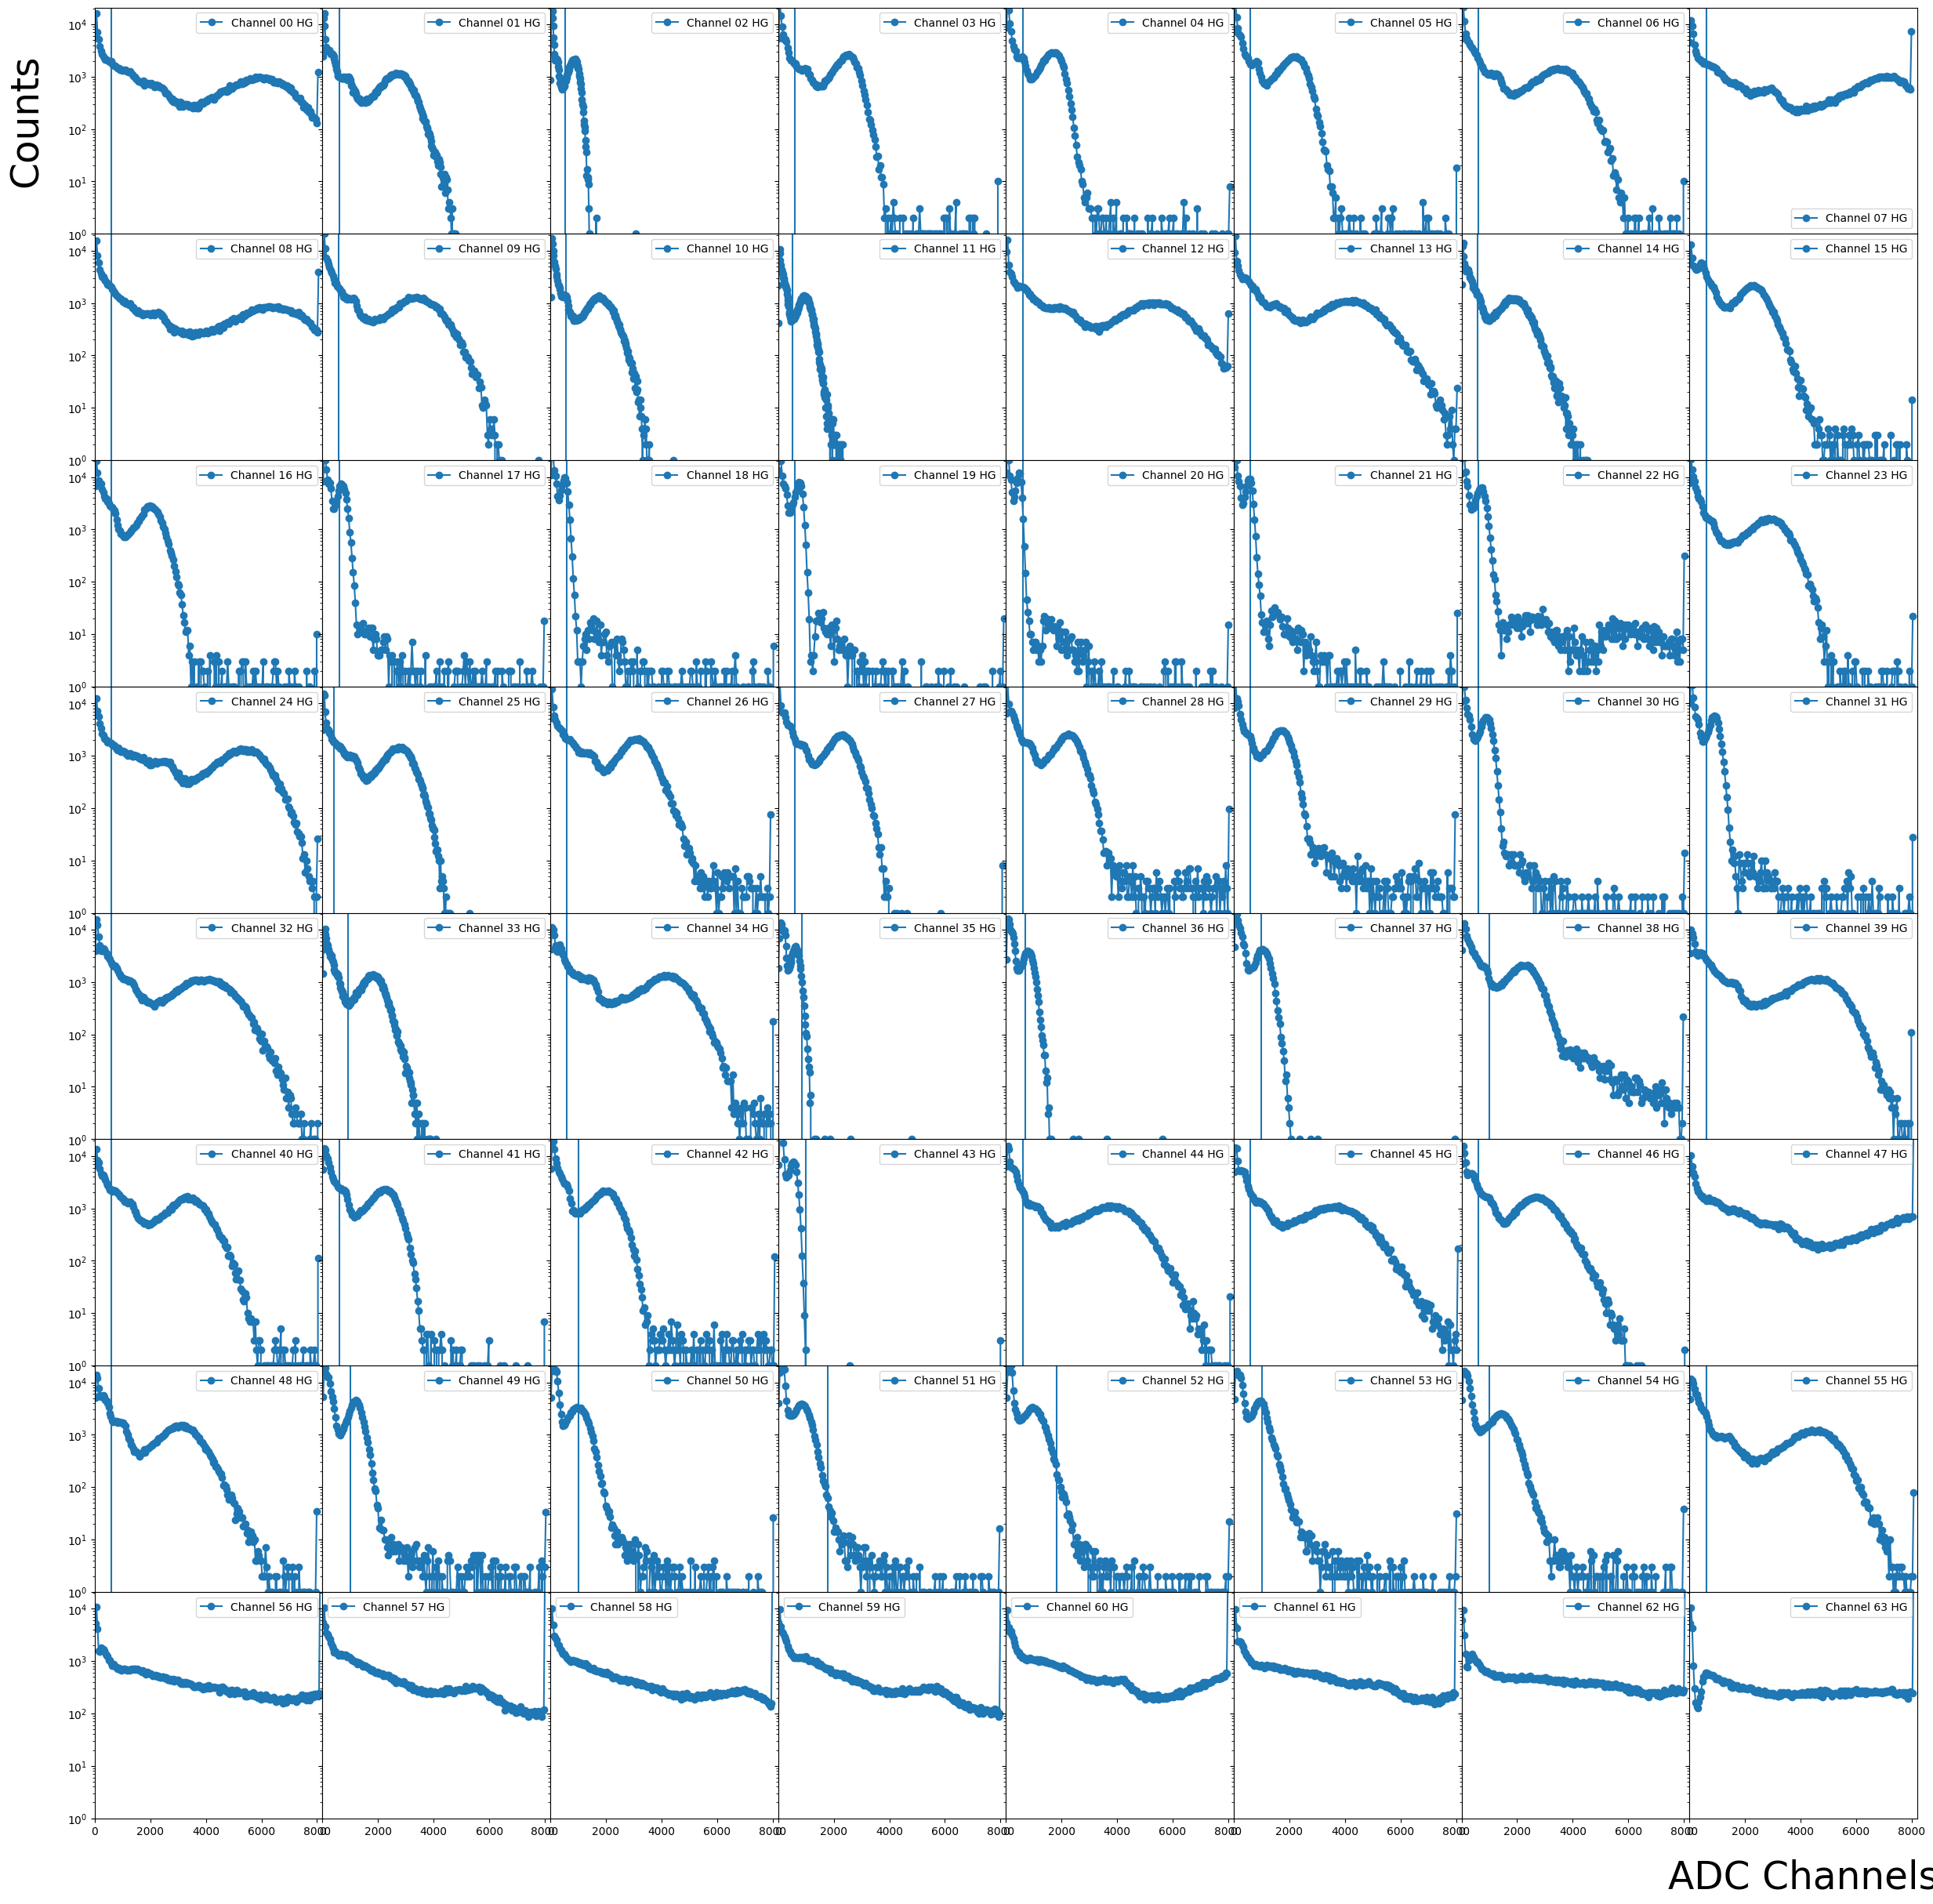

In [5]:
####### QA plots for individual channels 
datafile = 'data/Run45_list.txt'

with open(datafile) as f:
    lines = f.read().split('  0  00')[1:]

df = {}
dg = {}
for i in range(64):
    df[str(f'{i:02}')] = []
    dg[str(f'{i:02}')] = []

keys = list(df.keys())
for i in range(len(lines)):
    event = '  0  00' + lines[i]
    channels = [row.split() for row in event.split('\n')][:64]
    channel = [row[1] for row in channels]
    LG = [row[2] for row in channels]
    HG = [int(row[3]) for row in channels]
    for ch, hg, lg in zip(channel,HG,LG):
        df[ch].append(hg)
        dg[ch].append(lg)

fig, ax = plt.subplots(8,8,figsize=(30,30),sharex=True,sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)
cuts = []
for i in range(64):
    plt.sca(ax[i//8,i%8])
    bins, edges = np.histogram(np.array(df[keys[i]],dtype=int),bins=200)
    centers = edges[1:]/2+edges[:-1]/2
    plt.errorbar(centers,bins,fmt='-o',label=f'Channel {keys[i]} HG')
    baseline = 10*centers[np.argmax(bins)]
    plt.axvline(baseline)
    plt.yscale('log')
    cuts.append(baseline)
    plt.gca().set_ylim(bottom=1)
    plt.legend()
ax[0, 0].set_ylabel('Counts', fontsize=35, labelpad=20)
ax[-1, -1].set_xlabel('ADC Channels', fontsize=35, labelpad=20)
plt.xlim(0,8200)
plt.show()

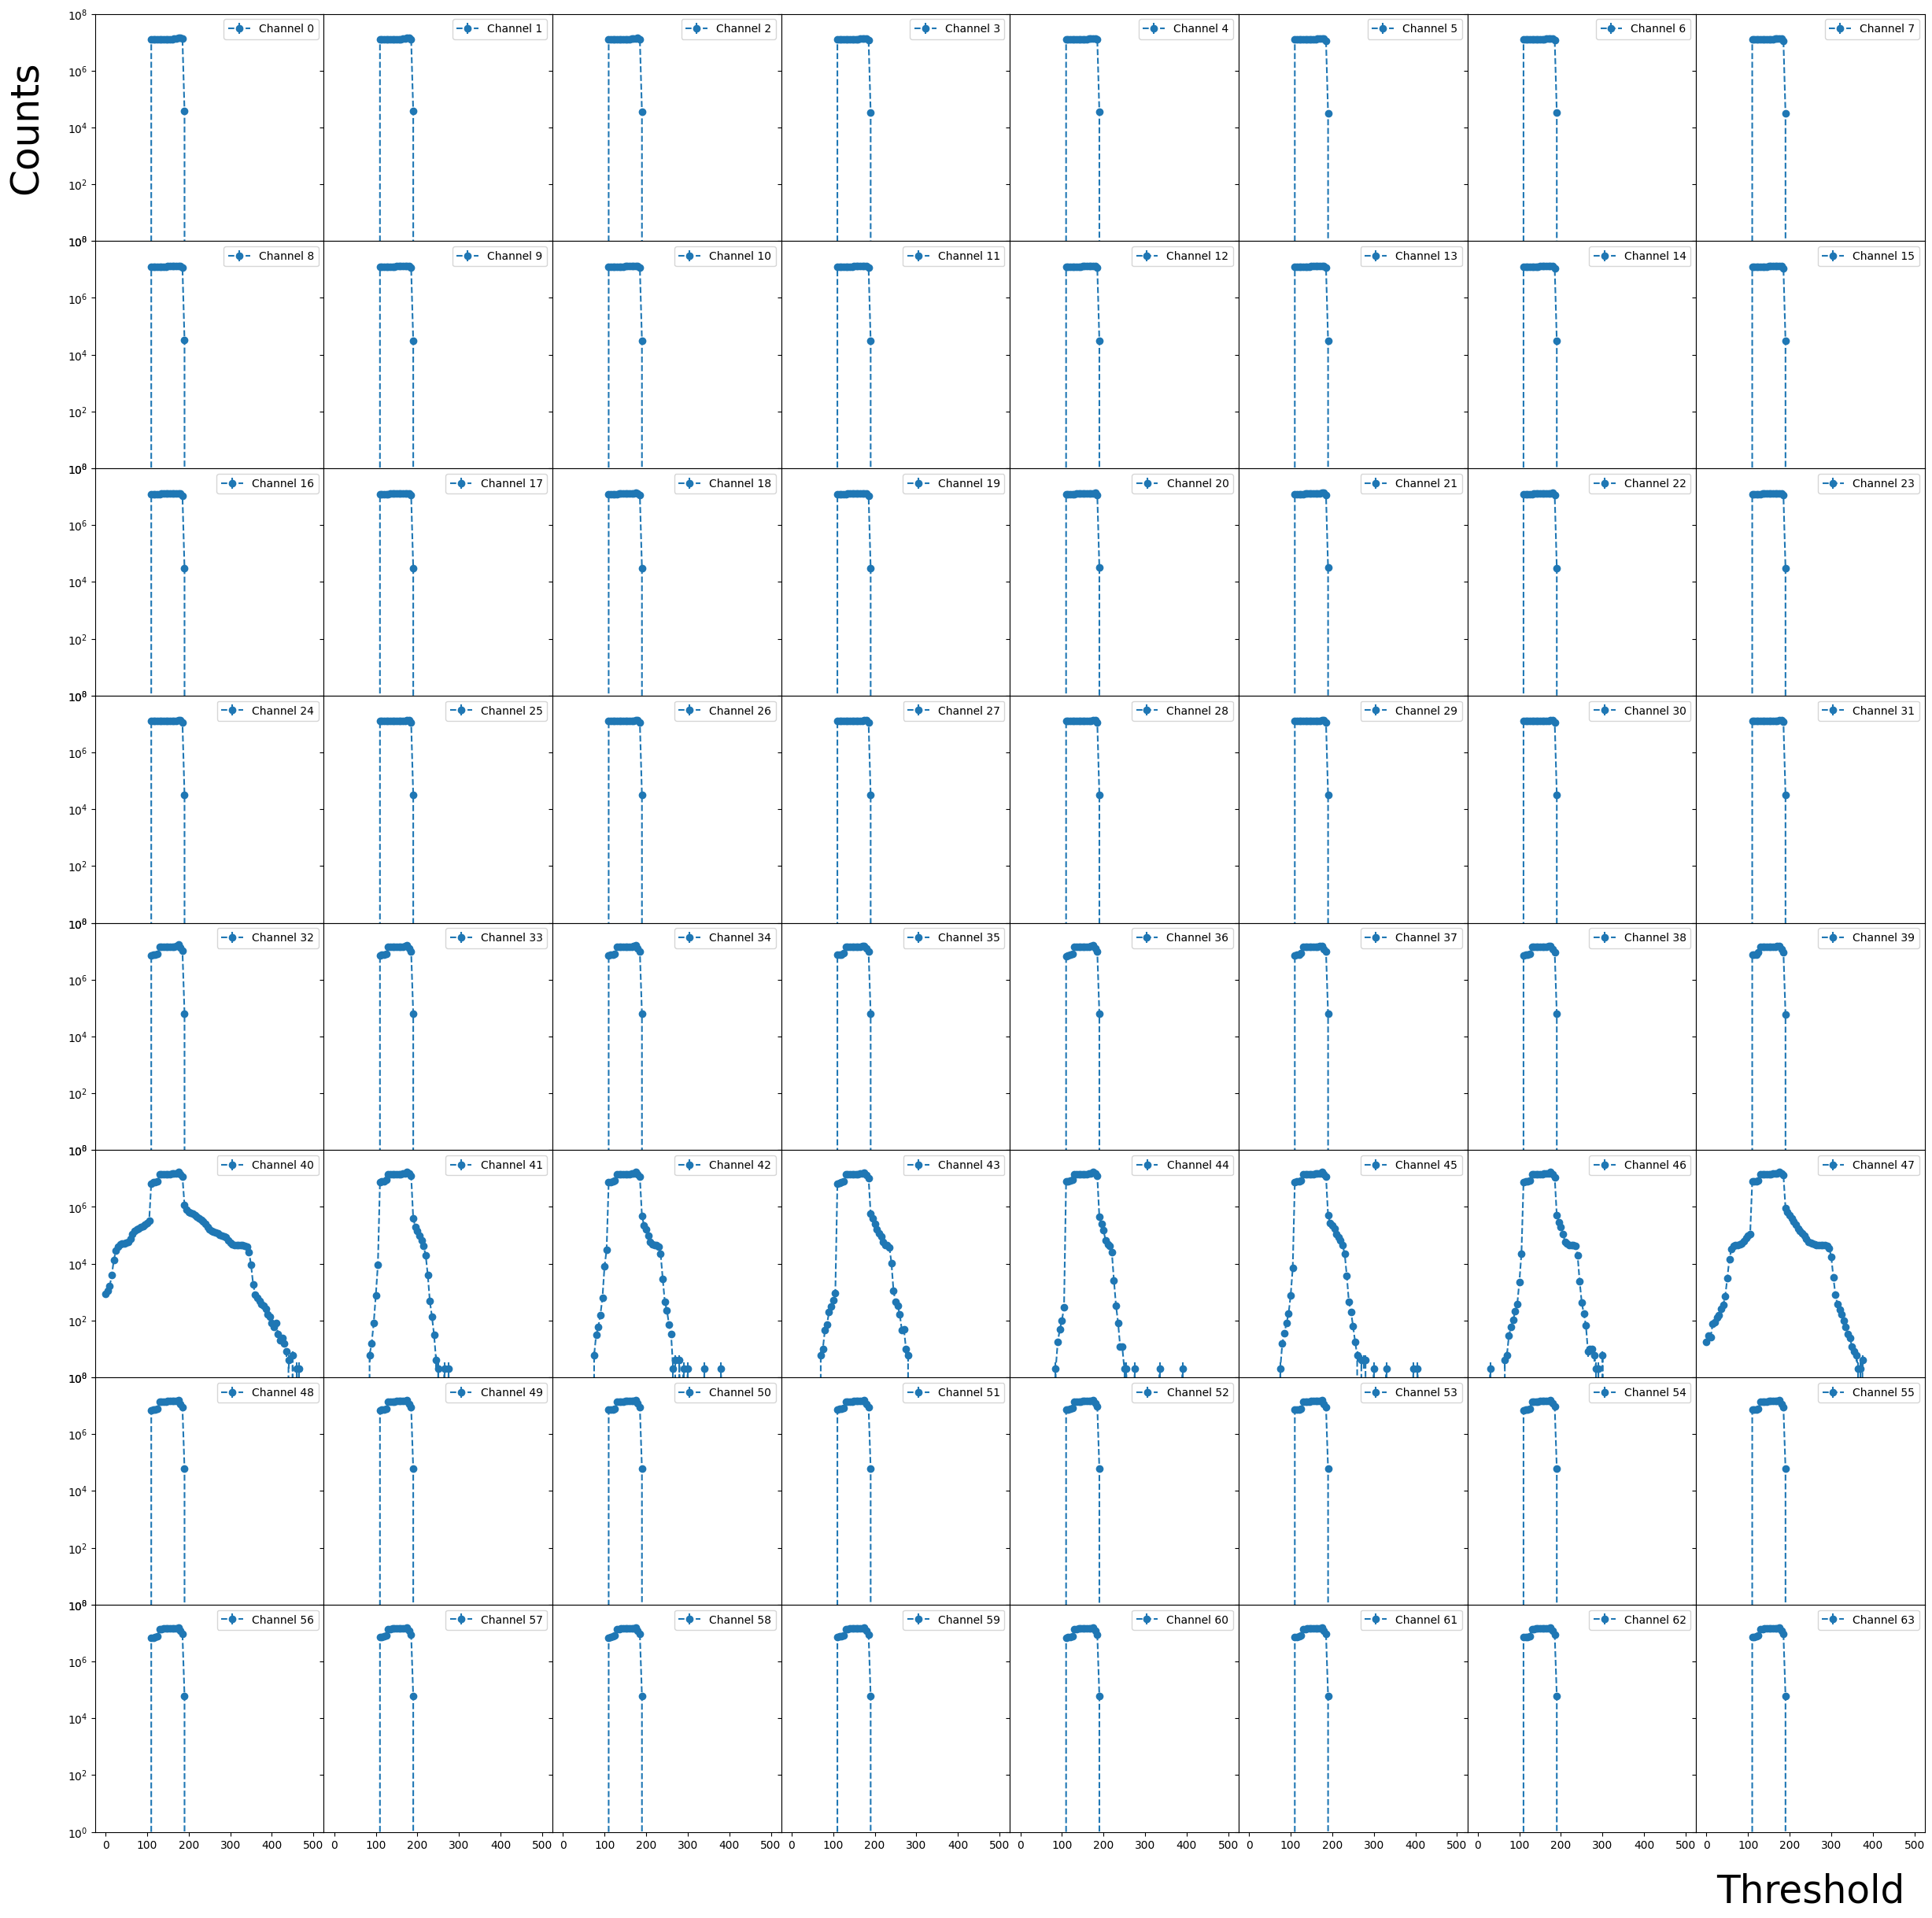

In [37]:
###### QA test for staircase per channel
path = 'data/staircase/'
files = sorted(os.listdir(path))

fig, ax = plt.subplots(8,8,figsize=(30,30),sharex=True,sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)
for file in files:
    if 'Staircase' not in file: continue
    channel = int(file.split('_')[-1].split('.txt')[0])
    plt.sca(ax[channel//8,channel%8])
    with open(path+file) as f:
        lines = f.read().split()
    threshold = np.array(lines[::2],dtype=float)
    counts = np.array(lines[1::2],dtype=float)
    plt.errorbar(threshold,counts,yerr=np.sqrt(counts),fmt='--o',label=f'Channel {channel}')
    plt.yscale('log')
    plt.gca().set_ylim(bottom=1,top=1E8)
    plt.legend()
    
ax[0, 0].set_ylabel('Counts', fontsize=35, labelpad=20)
ax[-1, -1].set_xlabel('Threshold', fontsize=35, labelpad=20)
plt.show()